# Réseaux de neurone récurrents


## Introduction

Les réseaux neuronaux récurrents (RNN) sont une classe de réseaux de neurones artificiels qui sont particulièrement adaptés à l'analyse de données séquentielles, telles que des séries temporelles, des phrases ou des séquences de symboles. Contrairement aux réseaux de neurones traditionnels, qui traitent chaque entrée indépendamment des autres, les RNN sont conçus pour conserver une mémoire interne qui leur permet de traiter des données séquentielles en prenant en compte les entrées précédentes.

Leur architecture se compose d'une série de nœuds de traitement de l'information (appelés "neurones") qui sont connectés entre eux pour former une boucle. Cette boucle permet à l'information de circuler d'un nœud à l'autre, en incorporant les données précédentes à chaque étape de traitement.

La principale force des RNN est leur capacité à modéliser des données séquentielles à long terme. Cela signifie qu'ils sont capables de prendre en compte l'historique complet des données jusqu'à un certain point dans le passé, et de les utiliser pour faire des prédictions sur les données futures. Les RNN sont donc très utiles dans de nombreuses applications telles que la reconnaissance vocale, la traduction automatique, la prédiction de séries temporelles, etc.

Il existe de nombreuses variantes de RNN, telles que les réseaux neuronaux à mémoire à court et long terme (LSTM pour Long Short-Term Memory et GRU GRU pour Gated Recurrent Unit), qui ont été développées pour surmonter certains des problèmes rencontrés par les RNN traditionnels, tels que le problème de la disparition du gradient.

<p align="center" width="80%">
<img src="https://3863425935-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LIA3amopGH9NC6Rf0mA%2F-LIA3mTJltflw3MVKAEQ%2F-LIA3nSKrqNJpLgASeso%2Fsequence.png?generation=1532415397328022&alt=media">
</p>

## Réseau récurrent "vanilla"

Les réseaux neuronaux récurrents traditionnels, également appelés réseaux neuronaux récurrents "vanilla", sont la forme la plus simple de réseaux neuronaux récurrents (RNN). Ils ont une architecture simple qui ne comporte qu'une seule couche de neurones récurrents, et ne possèdent pas de mécanisme de mémoire à long terme comme les réseaux LSTM ou GRU.

Les RNN traditionnels sont utiles pour les tâches qui impliquent la modélisation de séquences courtes et simples, comme la reconnaissance de caractères ou la prédiction de la prochaine valeur dans une série temporelle. Cependant, ils ont du mal à modéliser les séquences longues ou complexes en raison de la disparition du gradient, qui est un problème lié à la propagation de l'erreur dans le temps.

De plus, les RNN traditionnels ont tendance à souffrir de problèmes de surapprentissage lorsqu'ils sont utilisés pour des tâches plus complexes, car ils n'ont pas de mécanisme de régularisation comme les réseaux LSTM ou GRU.

En résumé, les réseaux neuronaux récurrents traditionnels sont utiles pour des tâches simples de modélisation de séquences, mais sont limités dans leur capacité à modéliser des séquences longues ou complexes en raison de la disparition du gradient. Ils sont également plus sujets au surapprentissage que les architectures de réseaux neuronaux récurrents plus avancées comme les LSTM et les GRU.

<p align="center" width="40%">
<img width="50%" src="https://www.researchgate.net/profile/Yao-Ming/publication/320726805/figure/fig2/AS:678275789639692@1538724958889/Illustration-of-the-vanilla-recurrent-neural-network.png
">
</p>


$h_t = \tanh(W_{hh}h_{t-1} + W_{xh}x_t + b_h)$

$y_t = W_{hy}h_t + b_y$

où :

* $h_t$ est le vecteur d'état caché à l'instant $t$
* $x_t$ est le vecteur d'entrée à l'instant $t$
* $W_{hh}$, $W_{xh}$, $W_{hy}$ sont les matrices de poids pour les connexions entre les neurones cachés, les entrées et les sorties, respectivement.
* $b_h$, $b_y$ sont les biais pour les neurones cachés et de sortie, respectivement.

La première équation calcule le vecteur d'état caché $h_t$ à l'instant $t$ en prenant en compte le vecteur d'entrée $x_t$ et l'état caché précédent $h_{t-1}$. La fonction d'activation utilisée est généralement la tangente hyperbolique ($\tanh$).

La deuxième équation calcule la sortie $y_t$ à l'instant $t$ en utilisant le vecteur d'état caché $h_t$ et les poids et biais appropriés.

En résumé, cette formule décrit comment un RNN vanilla calcule un vecteur d'état caché et une sortie à chaque instant $t$ en prenant en compte l'entrée courante et l'état caché précédent.

In [1]:
# Modèle RNN vanilla avec une couche RNN simple contenant 20 unités
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Nombre de pas de temps dans une séquence
time_steps = 10

# Dimensionnalité de chaque vecteur en entrée
input_dim = 5

# Création du modèle
model = Sequential()

# Couche RNN avec 20 unités
model.add(SimpleRNN(20, input_shape=(time_steps, input_dim)))

# Couche de sortie avec une unité et une fonction d'activation sigmoïde
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec une fonction de perte binary_crossentropy et un optimiseur adam
model.compile(loss='binary_crossentropy', optimizer='adam')

# Affichage de l'architecture du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                520       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


# LSTM

Un réseau de neurones à mémoire à court terme (LSTM pour Long Short-Term Memory) est une variante de réseau neuronal récurrent (RNN) qui a été conçue pour résoudre le problème de la disparition du gradient dans les RNN classiques, et pour améliorer la capacité de modélisation de séquences longues.

Les LSTM ont une architecture similaire à celle des RNN classiques, mais ils ajoutent des cellules de mémoire et des portes de contrôle qui permettent au réseau de conserver ou d'oublier les informations précédemment traitées selon la pertinence de ces informations pour la tâche en cours. Les portes de contrôle sont des mécanismes qui permettent au réseau de décider quelle information est importante et doit être conservée dans la mémoire de la cellule, et quelle information peut être ignorée ou oubliée.

Les LSTM sont particulièrement utiles pour le traitement de séquences longues et complexes, telles que des phrases ou des séries temporelles, car ils sont capables de conserver des informations importantes sur une longue période de temps. Ils sont également très utiles pour des tâches telles que la génération de texte, la traduction automatique, la reconnaissance de la parole et l'analyse de sentiments.

En résumé, les réseaux LSTM sont une extension des réseaux neuronaux récurrents qui sont capables de modéliser les dépendances à long terme dans les données séquentielles grâce à l'ajout de cellules de mémoire et de portes de contrôle. Cette architecture permet aux LSTM de conserver des informations pertinentes sur des séquences de données longues et complexes, ce qui les rend particulièrement utiles dans de nombreuses applications d'apprentissage en profondeur.

<p align="center" width="40%">
<img width="30%" src="https://miro.medium.com/v2/resize:fit:1008/format:webp/1*FPTmBD8GY9ZvkdsUBYXC9Q.png
">
</p>

\begin{array}
 ii_t &= \sigma(W_i[h_{t-1}, x_t] + b_i) \\
f_t &= \sigma(W_f[h_{t-1}, x_t] + b_f) \\
o_t &= \sigma(W_o[h_{t-1}, x_t] + b_o) \\
g_t &= \tanh(W_g[h_{t-1}, x_t] + b_g) \\
c_t &= f_t * c_{t-1} + i_t * g_t \\
h_t &= o_t * \tanh(c_t)
\end{array}

Où :

* $\sigma$ est la fonction sigmoïde
* $W_i$, $W_f$, $W_o$ et $W_g$ sont les matrices de poids apprises par le modèle pour la porte d'entrée, la porte d'oubli, la porte de sortie et l'état caché proposé, respectivement.
* $b_i$, $b_f$, $b_o$ et $b_g$ sont les biais appris par le modèle pour chaque porte.
* $h_{t-1}$ est l'état caché du RNN à l'instant $t-1$
* $x_t$ est l'entrée du RNN à l'instant $t$
* $i_t$, $f_t$, $o_t$, $g_t$, $c_t$ et $h_t$ sont respectivement les sorties de la porte d'entrée, de la porte d'oubli, de la porte de sortie, de l'état caché proposé, de l'état de la mémoire à long terme et de la sortie du RNN à l'instant $t$.

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Générer des données aléatoires
timesteps = 10
input_dim = 5
X_train = np.random.random((1000, timesteps, input_dim))
y_train = np.random.randint(2, size=(1000, 1))
X_val = np.random.random((100, timesteps, input_dim))
y_val = np.random.randint(2, size=(100, 1))

# Définir le modèle LSTM
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(timesteps, input_dim)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
32/32 [==============================] - 4s 41ms/step - loss: 0.6985 - accuracy: 0.4880 - val_loss: 0.6839 - val_accuracy: 0.6000
Epoch 2/10
32/32 [==============================] - 1s 16ms/step - loss: 0.6964 - accuracy: 0.4720 - val_loss: 0.6924 - val_accuracy: 0.5500
Epoch 3/10
32/32 [==============================] - 0s 15ms/step - loss: 0.6941 - accuracy: 0.4780 - val_loss: 0.6950 - val_accuracy: 0.4500
Epoch 4/10
32/32 [==============================] - 0s 15ms/step - loss: 0.6946 - accuracy: 0.5060 - val_loss: 0.6908 - val_accuracy: 0.5900
Epoch 5/10
32/32 [==============================] - 0s 11ms/step - loss: 0.6945 - accuracy: 0.4990 - val_loss: 0.6973 - val_accuracy: 0.4000
Epoch 6/10
32/32 [==============================] - 0s 10ms/step - loss: 0.6936 - accuracy: 0.5030 - val_loss: 0.6927 - val_accuracy: 0.5200
Epoch 7/10
32/32 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5050 - val_loss: 0.6955 - val_accuracy: 0.4700
Epoch 8/10
32/

## GRU

Un réseau de neurones à mémoire à court terme (GRU pour Gated Recurrent Unit) est une autre variante de réseau neuronal récurrent (RNN) qui a été introduite pour résoudre le même problème que les réseaux LSTM, à savoir la difficulté de modéliser les dépendances à long terme dans les données séquentielles.

Les GRU ont une architecture similaire à celle des LSTM, mais ils sont un peu plus simples et utilisent moins de paramètres. Contrairement aux LSTM, qui ont trois types de portes (porte d'entrée, porte de sortie et porte d'oubli) pour contrôler la mémoire des cellules, les GRU n'ont que deux portes (une porte de mise à jour et une porte de réinitialisation).

La porte de mise à jour des GRU est responsable de décider quelle partie des informations précédemment traitées doit être mémorisée pour la tâche en cours, tandis que la porte de réinitialisation permet de contrôler la quantité d'informations anciennes qui sont mélangées avec les nouvelles entrées.

Les GRU sont plus simples à entraîner que les LSTM car ils ont moins de paramètres et donc moins de risque de surapprentissage. Cependant, les LSTM ont tendance à être plus performants pour les tâches de modélisation de séquences longues et complexes.

<p align="center" width="40%">
<img width="30%" src="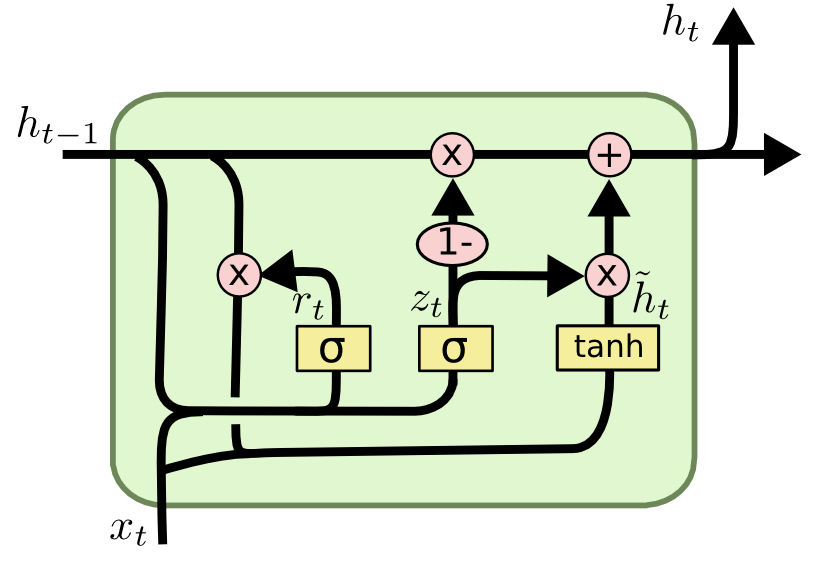
">
</p>


\begin{array}
zz_t &= \sigma(W_z[h_{t-1}, x_t]) \\
r_t &= \sigma(W_r[h_{t-1}, x_t]) \\
\tilde{h_t} &= \tanh(W[h_{t-1}r_t, x_t]) \\
h_t &= (1-z_t)h_{t-1} + z_t\tilde{h_t}
\end{array}

Où :

* $\sigma$ est la fonction sigmoïde
* $W_z$, $W_r$ et $W$ sont les matrices de poids apprises par le modèle pour la porte de mise à jour, la porte de réinitialisation et l'état caché proposé, respectivement.
* $h_{t-1}$ est l'état caché du RNN à l'instant $t-1$
* $x_t$ est l'entrée du RNN à l'instant $t$
* $z_t$, $r_t$, $\tilde{h_t}$ et $h_t$ sont respectivement les sorties de la porte de mise à jour, de la porte de réinitialisation, de l'état caché proposé et de la sortie du RNN à l'instant $t$.

En résumé, les réseaux GRU sont une variante des réseaux neuronaux récurrents qui ont été conçus pour surmonter le problème de la modélisation de séquences à long terme tout en utilisant moins de paramètres que les LSTM. Ils ont deux portes de contrôle pour contrôler la mémoire des cellules, ce qui les rend plus simples à entraîner que les LSTM, mais aussi moins performants pour certaines tâches de modélisation de séquences complexes.

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Générer des données aléatoires
timesteps = 10
input_dim = 5
X_train = np.random.random((1000, timesteps, input_dim))
y_train = np.random.randint(2, size=(1000, 1))
X_val = np.random.random((100, timesteps, input_dim))
y_val = np.random.randint(2, size=(100, 1))

# Définir le modèle GRU
model = keras.Sequential()
model.add(layers.GRU(64, input_shape=(timesteps, input_dim)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
32/32 [==============================] - 3s 28ms/step - loss: 0.6953 - accuracy: 0.4890 - val_loss: 0.6873 - val_accuracy: 0.5700
Epoch 2/10
32/32 [==============================] - 0s 11ms/step - loss: 0.6950 - accuracy: 0.5180 - val_loss: 0.6976 - val_accuracy: 0.4600
Epoch 3/10
32/32 [==============================] - 0s 10ms/step - loss: 0.6941 - accuracy: 0.4960 - val_loss: 0.6926 - val_accuracy: 0.4900
Epoch 4/10
32/32 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5190 - val_loss: 0.6894 - val_accuracy: 0.5900
Epoch 5/10
32/32 [==============================] - 0s 10ms/step - loss: 0.6921 - accuracy: 0.5190 - val_loss: 0.6926 - val_accuracy: 0.5200
Epoch 6/10
32/32 [==============================] - 0s 11ms/step - loss: 0.6930 - accuracy: 0.4950 - val_loss: 0.6907 - val_accuracy: 0.5600
Epoch 7/10
32/32 [==============================] - 0s 11ms/step - loss: 0.6905 - accuracy: 0.5420 - val_loss: 0.6990 - val_accuracy: 0.4600
Epoch 8/10
32